<a href="https://colab.research.google.com/github/vladwulf/ml-colab/blob/master/pytorch_playground2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Epoch [5/60], Loss: 10.4065
Epoch [10/60], Loss: 4.4245
Epoch [15/60], Loss: 2.0008
Epoch [20/60], Loss: 1.0187
Epoch [25/60], Loss: 0.6205
Epoch [30/60], Loss: 0.4590
Epoch [35/60], Loss: 0.3932
Epoch [40/60], Loss: 0.3663
Epoch [45/60], Loss: 0.3551
Epoch [50/60], Loss: 0.3503
Epoch [55/60], Loss: 0.3481
Epoch [60/60], Loss: 0.3470


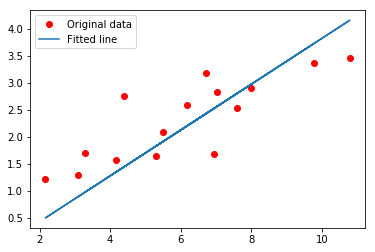

In [46]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# Logistic Regression

In [47]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

  0%|          | 16384/9912422 [00:00<01:27, 112667.44it/s]

9920512it [00:00, 29051150.41it/s]                           


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 448343.99it/s]
  1%|          | 16384/1648877 [00:00<00:11, 145606.61it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7552379.70it/s]                            
8192it [00:00, 180057.01it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Epoch [1/5], Step [100/600], Loss: 2.2375
Epoch [1/5], Step [200/600], Loss: 2.1290
Epoch [1/5], Step [300/600], Loss: 2.0251
Epoch [1/5], Step [400/600], Loss: 1.9752
Epoch [1/5], Step [500/600], Loss: 1.8990
Epoch [1/5], Step [600/600], Loss: 1.7557
Epoch [2/5], Step [100/600], Loss: 1.7242
Epoch [2/5], Step [200/600], Loss: 1.7029
Epoch [2/5], Step [300/600], Loss: 1.6339
Epoch [2/5], Step [400/600], Loss: 1.6381
Epoch [2/5], Step [500/600], Loss: 1.5223
Epoch [2/5], Step [600/600], Loss: 1.4760
Epoch [3/5], Step [100/600], Loss: 1.4397
Epoch [3/5], Step [200/600], Loss: 1.3563
Epoch [3/5], Step [300/600], Loss: 1.3498
Epoch [3/5], Step [400/600], Loss: 1.3574
Epoch [3/5], Step [500/600], Loss: 1.3548
Epoch [3/5], Step [600/600], Loss: 1.2254
Epoch [4/5], Step [100/600], Loss: 1.1734
Epoch [4/5], Step [200/600], Loss: 1.2847
Epoch [4/5], Step [300/6

# Feed Forward NN

In [48]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/5], Step [100/600], Loss: 0.3748
Epoch [1/5], Step [200/600], Loss: 0.3021
Epoch [1/5], Step [300/600], Loss: 0.1969
Epoch [1/5], Step [400/600], Loss: 0.1232
Epoch [1/5], Step [500/600], Loss: 0.1196
Epoch [1/5], Step [600/600], Loss: 0.1455
Epoch [2/5], Step [100/600], Loss: 0.1495
Epoch [2/5], Step [200/600], Loss: 0.0727
Epoch [2/5], Step [300/600], Loss: 0.1070
Epoch [2/5], Step [400/600], Loss: 0.0693
Epoch [2/5], Step [500/600], Loss: 0.1567
Epoch [2/5], Step [600/600], Loss: 0.0799
Epoch [3/5], Step [100/600], Loss: 0.0101
Epoch [3/5], Step [200/600], Loss: 0.0901
Epoch [3/5], Step [300/600], Loss: 0.0628
Epoch [3/5], Step [400/600], Loss: 0.0337
Epoch [3/5], Step [500/600], Loss: 0.0523
Epoch [3/5], Step [600/600], Loss: 0.0314
Epoch [4/5], Step [100/600], Loss: 0.0469
Epoch [4/5], Step [200/600], Loss: 0.0467
Epoch [4/5], Step [300/600], Loss: 0.1038
Epoch [4/5], Step [400/600], Loss: 0.0310
Epoch [4/5], Step [500/600], Loss: 0.0334
Epoch [4/5], Step [600/600], Loss:

# CNN

In [0]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [4]:

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

0it [00:00, ?it/s]

9920512it [00:01, 8773894.76it/s]                            


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134919.60it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2204522.95it/s]                            
0it [00:00, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 51685.26it/s]            


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Epoch [1/5], Step [100/600], Loss: 0.1344
Epoch [1/5], Step [200/600], Loss: 0.0832
Epoch [1/5], Step [300/600], Loss: 0.0689
Epoch [1/5], Step [400/600], Loss: 0.0615
Epoch [1/5], Step [500/600], Loss: 0.0724
Epoch [1/5], Step [600/600], Loss: 0.0560
Epoch [2/5], Step [100/600], Loss: 0.0199
Epoch [2/5], Step [200/600], Loss: 0.0140
Epoch [2/5], Step [300/600], Loss: 0.0363
Epoch [2/5], Step [400/600], Loss: 0.0783
Epoch [2/5], Step [500/600], Loss: 0.0456
Epoch [2/5], Step [600/600], Loss: 0.0088
Epoch [3/5], Step [100/600], Loss: 0.0681
Epoch [3/5], Step [200/600], Loss: 0.0805
Epoch [3/5], Step [300/600], Loss: 0.0555
Epoch [3/5], Step [400/600], Loss: 0.1001
Epoch [3/5], Step [500/600], Loss: 0.0929
Epoch [3/5], Step [600/600], Loss: 0.0344
Epoch [4/5], Step [100/600], Loss: 0.0138
Epoch [4/5], Step [200/600], Loss: 0.0423
Epoch [4/5], Step [300/600], Loss: 0.0084
Epoch [4/5], Step [400/600], Loss: 0.095

# RNN

In [5]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

Epoch [1/2], Step [100/600], Loss: 0.5057
Epoch [1/2], Step [200/600], Loss: 0.2239
Epoch [1/2], Step [300/600], Loss: 0.2998
Epoch [1/2], Step [400/600], Loss: 0.0609
Epoch [1/2], Step [500/600], Loss: 0.1309
Epoch [1/2], Step [600/600], Loss: 0.0586
Epoch [2/2], Step [100/600], Loss: 0.0691
Epoch [2/2], Step [200/600], Loss: 0.1141
Epoch [2/2], Step [300/600], Loss: 0.0941
Epoch [2/2], Step [400/600], Loss: 0.0963
Epoch [2/2], Step [500/600], Loss: 0.0464
Epoch [2/2], Step [600/600], Loss: 0.1208
Test Accuracy of the model on the 10000 test images: 97.65 %
